## 作业4：使用差分进化算法优化Restrigr函数
2112105068 韦青茂

Rastrigr函数的实现：

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def Rastrigr(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    return np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x) + 10, axis=-1)

def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = False

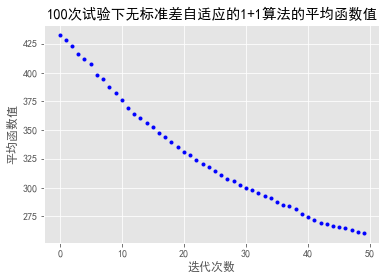

In [30]:
LB, UB = -5.12, 5.12                    # 输入变量的取值范围
N_DIM = 30                              # 输入变量的维度
MAX_ITER = 50                           # 迭代次数
POP_SIZE = 50                           # 种群规模
F = 0.4                                 # 步长参数
c = 0.4                                 # 交叉率
minY = [[] for _ in range(MAX_ITER)]
bestX = []
for _ in range(100):                    # 100次试验
    # 随机生成初始种群
    x = [randomF(LB, UB, [N_DIM]) for _ in range(POP_SIZE)] 
    output = 0         
    for i in range(MAX_ITER):
        y = Rastrigr(x)
        minY[i].append(np.min(y))
        # 归一化
        # cost = y/np.sum(y)
        x_new = []
        for idx in range(POP_SIZE): # 对于每个个体
            # 不放回地随机取三个个体 
            r = np.random.choice(POP_SIZE, 3, replace=False)
            # 变异向量
            v = x[r[0]] + F*(x[r[1]] - x[r[2]])
            J = np.random.randint(N_DIM)
            rc = np.random.rand(N_DIM)
            mask = rc<c
            # 变异
            new_individual = x[idx]*mask + v*~mask
            new_individual[J] = v[J]
            # 择优保留
            if Rastrigr(new_individual) < y[idx]:
                x_new.append(new_individual)
            else:
                x_new.append(x[idx])
        # x_new = [(x[_] + r[_])*np.sqrt(BETA*cost[_]) for _ in range(POP_SIZE)]
        x = x_new
        # print(len(x))
        # 淘汰个体
        # x = [x_all[s] for s in np.argsort(y_all)[:POP_SIZE]]
    y = Rastrigr(x)
    bestX.append(x[np.argmin(y)])

# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in minY]
figure = plt.plot(idx, avgY, '.', color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均函数值")
plt.title("100次试验下无标准差自适应的1+1算法的平均函数值")
plt.show()

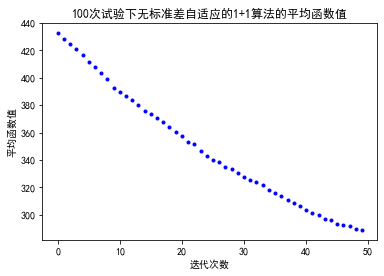

In [6]:
# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in minY]
figure = plt.plot(idx, avgY, '.', color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均函数值")
plt.title("100次试验下无标准差自适应的1+1算法的平均函数值")
plt.show()

[ 2.77772719 -3.01997058  2.97899322  2.00612046  0.12241577  0.16310615
  1.97935035 -1.50820256 -1.92124792  0.66586732 -0.96166458 -2.66121106
  2.10420857  0.05275257 -0.28118766  2.94139999  4.18589897  0.96628281
 -0.31961253 -5.85152008  4.33187048 -2.86102089  0.08111118  0.54666198
  1.10706086 -2.86015994  1.68405764  1.0187635   1.52221876  1.05193105]


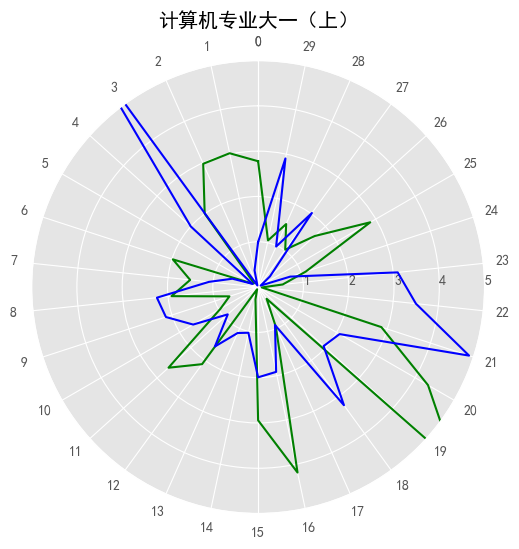

In [22]:

results = [{"大学英语": 87, "高等数学": 79, "体育": 95, "计算机基础": 92, "程序设计": 85},
           {"大学英语": 80, "高等数学": 90, "体育": 91, "计算机基础": 85, "程序设计": 88}]
data_length = len(results[0])
# 将极坐标根据数据长度进行等分
angles = np.linspace(0, 2*np.pi, 30, endpoint=False)
labels = [i for i in range(30)]
score = np.abs(bestX)
# 使雷达图数据封闭
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
# 设置图形的大小
fig = plt.figure(figsize=(8, 6), dpi=100)
# 新建一个子图
ax = plt.subplot(111, polar=True)
# 绘制雷达图
ax.plot(angles, score_a, color='g')
ax.plot(angles, score_b, color='b')
# 设置雷达图中每一项的标签显示
ax.set_thetagrids(angles*180/np.pi, labels)
# 设置雷达图的0度起始位置
ax.set_theta_zero_location('N')
# 设置雷达图的坐标刻度范围
ax.set_rlim(0, 5)
# 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
ax.set_rlabel_position(270)
ax.set_title("计算机专业大一（上）")
print(bestX[0])
plt.show()